In [16]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
import gmaps


# Google developer API key
from config import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

# File to Load (Remember to Change These)
traffic_file = "project_data.csv"

# Read Purchasing File and store into Pandas data frame
traffic_df = pd.read_csv(traffic_file)

traffic_df.head(2)

,ACC_ID,ROAD_NO,ROAD_NAME,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,9227453,10355,Povah Rd,122.229302,-17.929427,1/1/16,200.0,PDO Minor,Hit Object,NaN,0,0,0,0,0,0
1,9227808,1020997,Abernethy Rd,115.987176,-31.963001,1/1/16,0.0,PDO Major,Hit Object,NaN,0,0,0,0,0,0


In [17]:
traffic_df=traffic_df[["ROAD_NO","ROAD_NAME","LONGITUDE","LATITUDE","CRASH_DATE","CRASH_TIME","SEVERITY",\
    "TOTAL_BIKE_INVOLVED","TOTAL_TRUCK_INVOLVED","TOTAL_HEAVY_TRUCK_INVOLVED","TOTAL_MOTOR_CYCLE_INVOLVED","TOTAL_OTHER_VEHICLES_INVOLVED",\
    "TOTAL_PEDESTRIANS_INVOLVED"]]

traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136676 entries, 0 to 136675
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ROAD_NO                        136676 non-null  object 
 1   ROAD_NAME                      136676 non-null  object 
 2   LONGITUDE                      136676 non-null  float64
 3   LATITUDE                       136676 non-null  float64
 4   CRASH_DATE                     136676 non-null  object 
 5   CRASH_TIME                     136344 non-null  float64
 6   SEVERITY                       136676 non-null  object 
 7   TOTAL_BIKE_INVOLVED            136676 non-null  int64  
 8   TOTAL_TRUCK_INVOLVED           136676 non-null  int64  
 9   TOTAL_HEAVY_TRUCK_INVOLVED     136676 non-null  int64  
 10  TOTAL_MOTOR_CYCLE_INVOLVED     136676 non-null  int64  
 11  TOTAL_OTHER_VEHICLES_INVOLVED  136676 non-null  int64  
 12  TOTAL_PEDESTRIANS_INVOLVED    

<AxesSubplot:xlabel='SPEED LIMIT'>

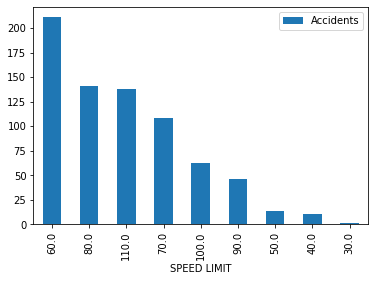

In [61]:
traffic_for_speed=pd.DataFrame(traffic_df["ROAD_NO"])

speed_limit=pd.read_csv("Legal_Speed_Limits.csv")

speed_df=pd.DataFrame({"ROAD_NO":speed_limit["ROAD"],"SPEED LIMIT":speed_limit["SPEED_LIMIT"]})
speed_df

merged_df = pd.merge(traffic_for_speed, speed_df, how="left", on="ROAD_NO")
merged_df["SPEED LIMIT"].value_counts()

# To remove unwanted rows
cleaned_speed=merged_df['SPEED LIMIT'].loc[merged_df['SPEED LIMIT']!="50km/h applies in built up areas or 110km/h outside built up areas"]

# To convert speed limit cells from object to float
cleaned_speed=cleaned_speed.str.replace("km/h"," ")
cleaned_speed=cleaned_speed.astype(float)


speedlimit_df=pd.DataFrame(cleaned_speed)
speedlimit_df["SEVERITY"]=traffic_df["SEVERITY"]
speedlimit_df=speedlimit_df.dropna()
grouped_speed=speedlimit_df.groupby(["SEVERITY"])["SPEED LIMIT"].value_counts()
# grouped_speed.iloc[0]
# speedlimit_df["SPEED LIMIT"].value_counts()
grouped_fatal_df=pd.DataFrame({"Accidents":grouped_speed["Fatal"]})
grouped_fatal_df.plot.bar()

In [72]:
# bins=[0,50,60,70,80,150]
# pd.cut(grouped_fatal_df["Accidents"],bins)
grouped_fatal_df.index

bins=[0,50,60,70,80,150]
pd.cut(grouped_fatal_df.index,bins)
grouped_fatal_df.iloc[:1]


# time_bins = [0, 359, 659, 959, 1259, 1559, 1859, 2159, 2359]
# time_names = ["1-3", "4-6", "7-9", "10-12", "13-15", "16-18", "19-21", "22-24"]
# group_time_df = traffic_df
# group_time_df["Time Interval"] = pd.cut(group_time_df["CRASH_TIME"],time_bins, labels=time_names)
# group_time_df


,Accidents
SPEED LIMIT,
60.0,211


<AxesSubplot:xlabel='SPEED LIMIT'>

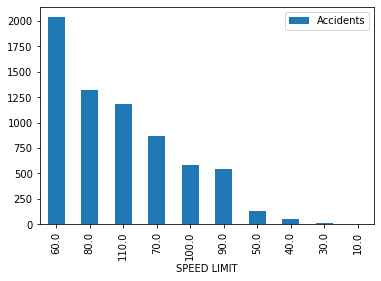

In [5]:
grouped_df=pd.DataFrame({"Accidents":grouped_speed["Hospital"]})
grouped_df.plot.bar()

<AxesSubplot:xlabel='SPEED LIMIT'>

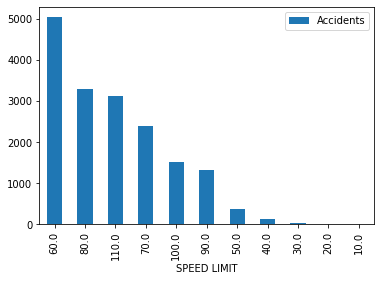

In [6]:
grouped_df=pd.DataFrame({"Accidents":grouped_speed["Medical"]})
grouped_df.plot.bar()

<AxesSubplot:xlabel='SEVERITY,SPEED LIMIT'>

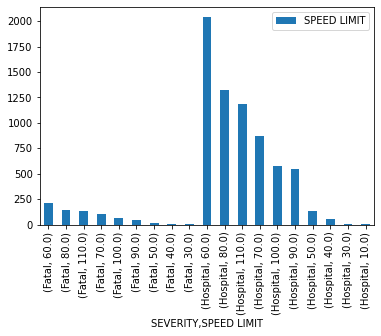

In [7]:
grouped_speed=speedlimit_df.groupby(["SEVERITY"])["SPEED LIMIT"].value_counts()
df=pd.DataFrame(grouped_speed[["Fatal","Hospital"]])
df.plot.bar()

In [8]:
# locations=traffic_df.loc[traffic_df["SEVERITY"]=="Fatal"][["LATITUDE","LONGITUDE"]]
locations=traffic_df[["LATITUDE", "LONGITUDE"]]

In [9]:
quantified_severity_df=traffic_df
quantified_severity_df["SEVERITY"]=quantified_severity_df["SEVERITY"].replace({"Fatal":5,"Hospital":4, "Medical":3, "PDO Major":2, "PDO Minor":1})
quantified_severity_df

,ROAD_NO,ROAD_NAME,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,10355,Povah Rd,122.229302,-17.929427,1/1/16,200.0,1,0,0,0,0,0,0
1,1020997,Abernethy Rd,115.987176,-31.963001,1/1/16,0.0,2,0,0,0,0,0,0
2,1080305,Ray Cl,116.019921,-32.214429,1/1/16,1910.0,3,0,0,0,0,1,1
3,1260018,Clydesdale St,115.861867,-32.007798,1/1/16,NaN,2,0,0,0,0,1,0
4,1070128,Warnbro Sound Av,115.759332,-32.335668,1/1/16,135.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136671,H624,Vincent St on to Mitchell Fwy (Northbound),115.837209,-31.935811,31/12/20,1735.0,2,0,0,0,0,2,0
136672,H032,South St,115.867758,-32.065776,31/12/20,1430.0,2,0,0,0,0,2,0
136673,H009,South Western Hwy,117.349191,-34.962397,31/12/20,1030.0,3,0,0,0,0,2,0
136674,1300280,Fitzgerald St,115.855339,-31.941352,31/12/20,540.0,3,0,0,0,0,1,0


In [7]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure()


fig = gmaps.figure(layout=figure_layout)
# fig = gmaps.figure(center=(0,0), zoom_level=8)


# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)


# Add marker layer ontop of heat map
# fig.add_layer(heat_layer)
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [14]:
weight=quantified_severity_df["SEVERITY"]

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=weight, \
    dissipating=False, max_intensity=5, point_radius=1)

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

# Plot Heatmap
fig = gmaps.figure(layout=figure_layout)
# fig = gmaps.figure(center=(0,0), zoom_level=2)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [25]:
traffic_df["LATITUDE"]=round(traffic_df["LATITUDE"],1)
traffic_df["LONGITUDE"]=round(traffic_df["LONGITUDE"],1)
traffic_df.head()

,ROAD_NO,ROAD_NAME,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,10355,Povah Rd,122.2,-17.9,1/1/16,200.0,PDO Minor,0,0,0,0,0,0
1,1020997,Abernethy Rd,116.0,-32.0,1/1/16,0.0,PDO Major,0,0,0,0,0,0
2,1080305,Ray Cl,116.0,-32.2,1/1/16,1910.0,Medical,0,0,0,0,1,1
3,1260018,Clydesdale St,115.9,-32.0,1/1/16,NaN,PDO Major,0,0,0,0,1,0
4,1070128,Warnbro Sound Av,115.8,-32.3,1/1/16,135.0,PDO Major,0,0,0,0,1,0


In [26]:
# converting date column to date month year 

traffic_df[["day", "month", "year"]] = traffic_df["CRASH_DATE"].str.split("/", expand = True)
traffic_df.info()
traffic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136676 entries, 0 to 136675
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ROAD_NO                        136676 non-null  object 
 1   ROAD_NAME                      136676 non-null  object 
 2   LONGITUDE                      136676 non-null  float64
 3   LATITUDE                       136676 non-null  float64
 4   CRASH_DATE                     136676 non-null  object 
 5   CRASH_TIME                     136344 non-null  float64
 6   SEVERITY                       136676 non-null  object 
 7   TOTAL_BIKE_INVOLVED            136676 non-null  int64  
 8   TOTAL_TRUCK_INVOLVED           136676 non-null  int64  
 9   TOTAL_HEAVY_TRUCK_INVOLVED     136676 non-null  int64  
 10  TOTAL_MOTOR_CYCLE_INVOLVED     136676 non-null  int64  
 11  TOTAL_OTHER_VEHICLES_INVOLVED  136676 non-null  int64  
 12  TOTAL_PEDESTRIANS_INVOLVED    

,ROAD_NO,ROAD_NAME,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED,day,month,year
0,10355,Povah Rd,122.2,-17.9,1/1/16,200.0,PDO Minor,0,0,0,0,0,0,1,1,16
1,1020997,Abernethy Rd,116.0,-32.0,1/1/16,0.0,PDO Major,0,0,0,0,0,0,1,1,16
2,1080305,Ray Cl,116.0,-32.2,1/1/16,1910.0,Medical,0,0,0,0,1,1,1,1,16
3,1260018,Clydesdale St,115.9,-32.0,1/1/16,NaN,PDO Major,0,0,0,0,1,0,1,1,16
4,1070128,Warnbro Sound Av,115.8,-32.3,1/1/16,135.0,PDO Major,0,0,0,0,1,0,1,1,16


In [4]:
traffic_df["TOTAL_MOTOR_CYCLE_INVOLVED"].value_counts()
#traffic_df["TOTAL_BIKE_INVOLVED"].value_counts()
traffic_df["TOTAL_OTHER_VEHICLES_INVOLVED"].value_counts()
round(traffic_df["LATITUDE"],1).value_counts()

# traffic_df.groupby

-31.9    38071
-32.0    33877
-32.1    18964
-31.8    11004
-31.7     4446
         ...  
-19.2        1
-24.3        1
-24.0        1
-19.4        1
-16.1        1
Name: LATITUDE, Length: 194, dtype: int64

In [ ]:
## TO-DO/EXPLORE >> This is just to explore the pattern/relationship between variable to see what is happening (the overall picture) after that we can hypothesis/test these relationships and weather they have a significant impact on accidents 

# How to round/Lat-lon to narrow down traffic zones (at the moment round to 1)

# Explore the relationships between the roads/suburb (lat/lon) and: 

    # Yearly pattern of accidents 

    # Pattern of accident by season/months 

    # Patterns of accident by day/night # use bin function to separate in 3 hour intervals -- > 

## ^^ Try and do groupby.severity

# How the accidents are in relation to: 
    
    # Year (time series) 

    # Season/months 

    # Day/night 

#Vehicle type (motorcycle/truck/car - other vehicle) - this can also link to cause potentially

    # Day/night 

    # Season/month
    
    # Year 

# Idea, if we can incorporate a colour map 